
# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.


# Install the necessary modules and download our files

In [1]:
!pip install deepface
!pip install dlib

In [2]:
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt
import gdown
%matplotlib inline

# Define our imshow function

In [3]:
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
! gdown --id 1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CYpEuzNpsBaUJ54wVN2m3VYSh2cdTRK5
To: /content/shape_predictor_68_face_landmarks.dat
100% 99.7M/99.7M [00:00<00:00, 136MB/s]


# Download our test images and a test pic

In [5]:
!gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ
To: /content/face_recognition.zip
100% 4.84M/4.84M [00:00<00:00, 30.0MB/s]


In [6]:
# !unzip -q /content/face_recognition.zip

In [7]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg

--2025-04-24 11:56:21--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/me.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg [following]
--2025-04-24 11:56:22--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/me.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43804 (43K) [image/jpeg]
Saving to: ‘me.jpg.1’

me.jpg.1            100%[===================>]  42.78K  --.-KB/s    in 0.01s   

2025-04-24 11:56:22 (4.07 MB/s) - ‘me.jpg.1’ saved [43804/43804]



# Demonstrate facial landmarks

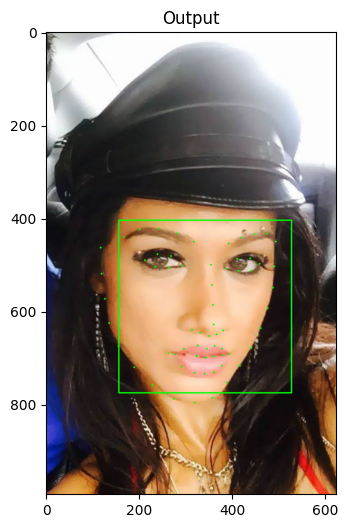

In [8]:
from imutils import face_utils

p = "/content/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('/content/people/nidia2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get faces
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y)
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

# Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace

In [9]:
%cd /content/
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

/content
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: /content/facial_expression_model_weights.zip
100% 5.54M/5.54M [00:00<00:00, 38.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI&confirm=t&uuid=83e1713c-130d-45b4-a77a-486fe769aa97
To: /content/age_model_weights.h5
100% 539M/539M [00:08<00:00, 62.9MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: Futu

In [10]:
from deepface import DeepFace

# Analyze the image
obj = DeepFace.analyze(img_path="/content/training_faces/Nidia_1.jpg", actions=['age', 'gender', 'race', 'emotion'])

# Access the first result (usually there's only one face in the image)
result = obj[0]

# Print details
print(f"{result['age']} years old, {result['dominant_race']} race, {result['dominant_emotion']} emotion, {result['gender']} gender")


Action: emotion: 100%|██████████| 4/4 [00:15<00:00,  3.93s/it]

32 years old, asian race, sad emotion, {'Woman': np.float32(99.99286), 'Man': np.float32(0.007144313)} gender


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]


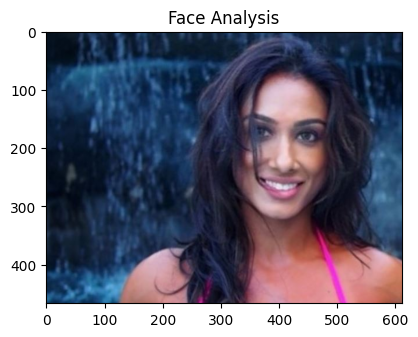

[   {   'age': 31,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': np.float32(1.5507997e-06),
                       'disgust': np.float32(3.236122e-14),
                       'fear': np.float32(2.5850072e-10),
                       'happy': np.float32(83.399216),
                       'neutral': np.float32(16.600464),
                       'sad': np.float32(7.169197e-06),
                       'surprise': np.float32(0.00030955017)},
        'face_confidence': np.float64(0.94),
        'gender': {   'Man': np.float32(0.0016121474),
                      'Woman': np.float32(99.99839)},
        'race': {   'asian': np.float32(27.304321),
                    'black': np.float32(8.791084),
                    'indian': np.float32(19.725592),
                    'latino hispanic': np.float32(26.151613),
                    'middle eastern': np.float32(8.63758),
                    'white': np.flo

In [11]:
import pprint

img_path = "/content/training_faces/Nidia_4.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

# Create a simple function to display our results on the image

In [12]:
import cv2
import matplotlib.pyplot as plt

def drawFace(img_path, obj):
    image = cv2.imread(img_path)

    # Access the first face in the result
    face_data = obj[0]

    x = face_data['region']['x']
    y = face_data['region']['y']
    h = face_data['region']['h']
    w = face_data['region']['w']

    age = face_data['age']
    gender = face_data['gender']
    gender = 'F' if gender == 'Woman' else 'M'

    dominant_emotion = face_data['dominant_emotion']
    dominant_race = face_data['dominant_race']

    description = f'{age}{gender} - {dominant_emotion}'

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, description, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    cv2.putText(image, dominant_race, (x, y + h + 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title("Face Analysis")
    plt.axis('off')
    plt.show()


# Test on another image

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]


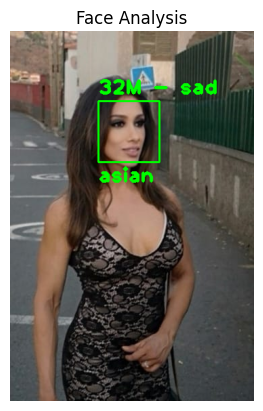

[   {   'age': 32,
        'dominant_emotion': 'sad',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': np.float32(0.0021040777),
                       'disgust': np.float32(1.3389179e-06),
                       'fear': np.float32(1.1232663),
                       'happy': np.float32(17.55627),
                       'neutral': np.float32(34.926517),
                       'sad': np.float32(46.39107),
                       'surprise': np.float32(0.00077645935)},
        'face_confidence': np.float64(0.95),
        'gender': {   'Man': np.float32(0.007144313),
                      'Woman': np.float32(99.99286)},
        'race': {   'asian': np.float32(51.312183),
                    'black': np.float32(2.9460614),
                    'indian': np.float32(16.348516),
                    'latino hispanic': np.float32(16.405935),
                    'middle eastern': np.float32(5.798344),
                    'white': np.float32(7.188

In [13]:
img_path = "/content/training_faces/Nidia_1.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


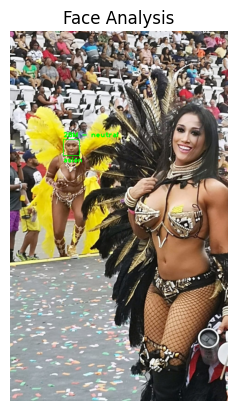

[   {   'age': 28,
        'dominant_emotion': 'neutral',
        'dominant_gender': 'Woman',
        'dominant_race': 'asian',
        'emotion': {   'angry': np.float32(1.8014547),
                       'disgust': np.float32(2.4954631e-06),
                       'fear': np.float32(0.24216902),
                       'happy': np.float32(0.009968977),
                       'neutral': np.float32(84.91586),
                       'sad': np.float32(13.030474),
                       'surprise': np.float32(6.9588496e-05)},
        'face_confidence': np.float64(0.93),
        'gender': {'Man': np.float32(14.065641), 'Woman': np.float32(85.93436)},
        'race': {   'asian': np.float32(87.06141),
                    'black': np.float32(0.15945753),
                    'indian': np.float32(7.8367968),
                    'latino hispanic': np.float32(4.678548),
                    'middle eastern': np.float32(0.016291633),
                    'white': np.float32(0.24750295)},
        're

In [14]:
img_path = "/content/training_faces/Nidia_3.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = img_path, actions = ['age', 'gender', 'race', 'emotion'])
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

# Perform Facial Similarity

In [15]:
result  = DeepFace.verify("/content/training_faces/Nidia_1.jpg", "/content/training_faces/Nidia_3.jpg")
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.52636190146194,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 130,
   'y': 103,
   'w': 90,
   'h': 90,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 677,
   'y': 364,
   'w': 179,
   'h': 179,
   'left_eye': (793, 441),
   'right_eye': (735, 428)}},
 'time': 8.4}

# We can even use different Distance Metrics

In [16]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("training_faces/Nidia_1.jpg", "training_faces/Nidia_4.jpg", distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.9339650806475818,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 130,
   'y': 103,
   'w': 90,
   'h': 90,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 309,
   'y': 102,
   'w': 200,
   'h': 200,
   'left_eye': (446, 180),
   'right_eye': (373, 172)}},
 'time': 1.32}

In [17]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("/content/training_faces/Nidia_6.jpg", "/content/training_faces/Nidia_5.jpg", distance_metric = 'cosine')
print("Is verified: ", result["verified"])
result

Is verified:  False


{'verified': False,
 'distance': 0.7126586738965895,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 0,
   'y': 17,
   'w': 546,
   'h': 621,
   'left_eye': (304, 261),
   'right_eye': (177, 293)},
  'img2': {'x': 86,
   'y': 176,
   'w': 250,
   'h': 250,
   'left_eye': (252, 265),
   'right_eye': (155, 276)}},
 'time': 2.02}

# Download models as the existing DeepFace downloader has stopped working

In [18]:
%cd /content/
!gdown --id 1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
!gdown --id 1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc

/content
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1
From (redirected): https://drive.google.com/uc?id=1OdJNKL85CCYStVi9XtJRpHhXo2FU6Gf1&confirm=t&uuid=82f043c2-8282-4cf0-89b1-a18295761666
To: /content/vgg_face_weights.h5
100% 580M/580M [00:09<00:00, 62.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GWIuvW3Vm3wMpGGEyTT7sU-c1cVWZIEc
To: /content/facenet_weights.h5
100% 92.2M/92.2M [00:00<00:00, 122MB/s]


#  Perform Facial Recognition

In [19]:
import pandas as pd

df = DeepFace.find(img_path = "./training_faces/Nidia_1.jpg", db_path = './training_faces/', detector_backend = 'ssd')
df

25-04-24 11:58:13 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 11:58:13 - deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt

28.1kB [00:00, 36.1MB/s]                   


25-04-24 11:58:13 - res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel

100%|██████████| 10.7M/10.7M [00:00<00:00, 150MB/s]
Finding representations:  56%|█████▌    | 5/9 [00:07<00:07,  1.78s/it]

25-04-24 11:58:21 - 🔴 Exception while extracting faces from ./training_faces/Nidia_3.jpg: Face could not be detected in ./training_faces/Nidia_3.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations:  78%|███████▊  | 7/9 [00:08<00:02,  1.04s/it]

25-04-24 11:58:21 - 🔴 Exception while extracting faces from ./training_faces/Nidia_2.jpg: Face could not be detected in ./training_faces/Nidia_2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


25-04-24 11:58:22 - There are now 9 representations in ds_model_vggface_detector_ssd_aligned_normalization_base_expand_0.pkl
25-04-24 11:58:22 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 11:58:23 - find function duration 9.567658424377441 seconds


[                       identity                                      hash  \
 0  ./training_faces/Nidia_1.jpg  c8847ad3def0d8cfd7a2e24228e1030ba27658ff   
 1  ./training_faces/Nidia_4.jpg  d3d01beb0d943679379d10e97c27e53ed6e8c17c   
 2  ./training_faces/Nidia_5.jpg  bc8a8c8998a1246b952c5fefbee89579e308cb8b   
 3  ./training_faces/Nidia_6.jpg  90744af71c32d52965a816c62affa31675d0dcbf   
 
    target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
 0       136        91        63       105       136        91        63   
 1       321        74       167       246       136        91        63   
 2        92       148       227       284       136        91        63   
 3       124        98       306       438       136        91        63   
 
    source_h  threshold  distance  
 0       105       0.68  0.000000  
 1       105       0.68  0.409125  
 2       105       0.68  0.527627  
 3       105       0.68  0.591533  ]

In [21]:
from deepface import DeepFace
import pandas as pd

dfs = []
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]

for model in models:
    try:
        df = DeepFace.find(
            img_path="./training_faces/Nidia_1.jpg",
            db_path="./training_faces/",
            model_name=model,
            detector_backend='ssd',
            enforce_detection=False  # optional: skip detection failure
        )

        # Check if it's a list of DataFrames or a single DataFrame
        if isinstance(df, list):
            df = pd.concat(df, ignore_index=True)  # flatten list of DataFrames

        df['model'] = model
        dfs.append(df)

    except Exception as e:
        print(f"⚠️ Error for model {model}: {e}")

# Combine all results
final_df = pd.concat(dfs, ignore_index=True)
print(final_df)


25-04-24 12:05:29 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 12:05:30 - find function duration 0.6772589683532715 seconds
25-04-24 12:05:30 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 12:05:33 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5

  0%|          | 0.00/92.2M [00:00<?, ?B/s]
 12%|█▏        | 11.0M/92.2M [00:00<00:00, 89.1MB/s]
 27%|██▋       | 25.2M/92.2M [00:00<00:00, 116MB/s] 
 43%|████▎     | 39.8M/92.2M [00:00<00:00, 128MB/s]
 58%|█████▊    | 53.5M/92.2M [00:00<00:00, 131MB/s]
 80%|████████  | 73.9M/92.2M [00:00<00:00, 138MB/s]
100%|██████████| 92.2M/92.2M [00:00<00:00, 131MB/s]
Finding representations: 100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


25-04-24 12:05:42 - There are now 9 representations in ds_model_facenet_detector_ssd_aligned_normalization_base_expand_0.pkl
25-04-24 12:05:42 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 12:05:43 - find function duration 13.089726448059082 seconds
25-04-24 12:05:43 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 12:05:44 - openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5

  0%|          | 0.00/15.3M [00:00<?, ?B/s]
100%|██████████| 15.3M/15.3M [00:00<00:00, 108MB/s] 
Finding representations: 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


25-04-24 12:05:50 - There are now 9 representations in ds_model_openface_detector_ssd_aligned_normalization_base_expand_0.pkl
25-04-24 12:05:50 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 12:05:50 - find function duration 6.939840793609619 seconds
25-04-24 12:05:50 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]


⚠️ Error for model DeepFace: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.18. You need to downgrade your tf.
25-04-24 12:05:50 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 12:05:50 - deepid_keras_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/deepid_keras_weights.h5
To: /root/.deepface/weights/deepid_keras_weights.h5

100%|██████████| 1.61M/1.61M [00:00<00:00, 29.3MB/s]
Finding representations: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


25-04-24 12:05:55 - There are now 9 representations in ds_model_deepid_detector_ssd_aligned_normalization_base_expand_0.pkl
25-04-24 12:05:55 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 12:05:55 - find function duration 5.510806322097778 seconds
25-04-24 12:05:55 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 12:05:57 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5

  0%|          | 0.00/137M [00:00<?, ?B/s]
 16%|█▌        | 21.5M/137M [00:00<00:00, 209MB/s]
 44%|████▎     | 59.8M/137M [00:00<00:00, 309MB/s]
 69%|██████▉   | 94.9M/137M [00:00<00:00, 327MB/s]
100%|██████████| 137M/137M [00:00<00:00, 323MB/s]
Finding representations: 100%|██████████| 9/9 [00:09<00:00,  1.05s/it]


25-04-24 12:06:05 - There are now 9 representations in ds_model_arcface_detector_ssd_aligned_normalization_base_expand_0.pkl
25-04-24 12:06:05 - Searching ./training_faces/Nidia_1.jpg in 9 length datastore
25-04-24 12:06:05 - find function duration 9.77330470085144 seconds
25-04-24 12:06:05 - Found 9 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/9 [00:00<?, ?it/s]

25-04-24 12:06:05 - dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


Downloading...
From: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
To: /root/.deepface/weights/dlib_face_recognition_resnet_model_v1.dat.bz2

  0%|          | 0.00/21.4M [00:00<?, ?B/s]
  2%|▏         | 524k/21.4M [00:00<00:12, 1.74MB/s]
  7%|▋         | 1.57M/21.4M [00:00<00:04, 4.26MB/s]
 22%|██▏       | 4.72M/21.4M [00:00<00:01, 11.7MB/s]
 39%|███▉      | 8.39M/21.4M [00:00<00:00, 17.7MB/s]
100%|██████████| 21.4M/21.4M [00:00<00:00, 25.1MB/s]
Finding representations:   0%|          | 0/9 [00:02<?, ?it/s]

⚠️ Error for model Dlib: Error while calling cudaGetDevice(&the_device_id) in file /tmp/.tmplhoiAU/sdists-v9/pypi/dlib/19.24.6/myhuNI8MNAU5FPqAHNVyi/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version
                        identity                                      hash  \
0   ./training_faces/Nidia_1.jpg  c8847ad3def0d8cfd7a2e24228e1030ba27658ff   
1   ./training_faces/Nidia_4.jpg  d3d01beb0d943679379d10e97c27e53ed6e8c17c   
2   ./training_faces/Nidia_5.jpg  bc8a8c8998a1246b952c5fefbee89579e308cb8b   
3   ./training_faces/Nidia_6.jpg  90744af71c32d52965a816c62affa31675d0dcbf   
4   ./training_faces/Nidia_1.jpg  c8847ad3def0d8cfd7a2e24228e1030ba27658ff   
5   ./training_faces/Nidia_4.jpg  d3d01beb0d943679379d10e97c27e53ed6e8c17c   
6   ./training_faces/Nidia_1.jpg  c8847ad3def0d8cfd7a2e24228e1030ba27658ff   
7   ./training_faces/Nidia_1.jpg  c8847ad3def0d8cfd7a2e24228e1030ba27658ff   
8   ./training_faces/Nidia_1.jpg  c884